In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import folium

%load_ext autotime

time: 4.23 ms (started: 2021-12-05 21:14:04 -05:00)


<h1 align="center">An Analysis of Worldwide Air Quality</h1>

## Problem Statement

Our goal of the project was the answer the following question: 

- Is there a correlation between population size and air quality?
- Additionally, is there a correlation between elevation and air quality?
- Finally, how does each of the three pollutants correlate with air quality?

## Data

To answer our questions, we used data from two APIs: Air Quality Programmatic API and the Spott REST API. 

The Air Quality Programmatic API provides city level data about air quality index and individual pollutants (PM2.5, PM10, Ozone (O3)). The API also provides data on city latitude and longitude. 

The Spott API provides city level data on population and elevation through directly searching for the city's name. 

### Air Quality Programmatic API

First, we webscraped data, using Beautiful Soup, to gather the 1000 most populated cities in the world. The website we scraped data from is https://data.mongabay.com/cities_pop_01.htm'.  

Once we webscrapped the 1000 most populated cities, we ran the list of cities through the Air Quality Programmatic API. After dropping N/A data, we stored the data in a csv format. There are 526 rows and 9 columns. The size of the stored data is 35 KB.

In [2]:
air_quality_api = pd.read_csv('waqi_df.csv')
air_quality_api.sample(5)

,Unnamed: 0,cities,aqi,latitude,longitude,pm25,pm10,o3,uvi,date
442,813,Deyang,132,31.126856,104.398021,132.0,25.0,7.0,1.0,11-30-2021
327,567,Saratov,42,51.520030,46.023620,42.0,9.0,18.0,2.0,11-30-2021
139,205,Yantai,42,37.463822,121.447935,42.0,28.0,4.0,0.0,11-30-2021
500,935,Botou,115,38.079000,116.570000,114.0,20.0,1.0,1.0,11-30-2021
365,641,Gongyi,82,34.748589,112.990268,82.0,19.0,8.0,1.0,11-30-2021


time: 35.9 ms (started: 2021-12-05 21:14:06 -05:00)


### Spott API

For the Spott API, are main contraint was the number of free requests we received. Per account, Spott only granted us 1000 requests. To limit the number of requests, we made a list of cities from the Air Quality API and ran those cities through the Spott API.

We stored the data in a csv format. There are 526 rows and 3 columns. The size of the stored data is 14 KB.

In [3]:
spott_api = pd.read_csv('spott_df.csv')
spott_api.sample(5)

,Unnamed: 0,Cities,Population,Elevation
431,431,Changzhi,NaN,937.0
518,518,Sarajevo,696731.0,509.0
167,167,Kyoto,1459640.0,50.0
103,103,Frankfurt Am Main,650000.0,113.0
235,235,Rizhao,NaN,10.0


time: 11.2 ms (started: 2021-12-05 21:14:07 -05:00)


## Data Cleaning and Manipulation 

In [4]:
import functions

time: 5.66 ms (started: 2021-12-05 21:14:08 -05:00)


First, we cleaned both the individual APIs. In the Spott API, we dropped the "Unamed: 0" column, a column that appears when we read csv files.

In [5]:
spott_df = functions.clean_spott_api('spott_df.csv')
spott_df.sample(3)

,Cities,Population,Elevation
100,Changsha,3093980.0,67.0
493,Louisville,243639.0,142.0
435,Sheffield,685368.0,75.0


time: 13.5 ms (started: 2021-12-05 21:14:08 -05:00)


Second, we cleaned the WAQI API. We dropped the "Unamed:0, UVI, and Date columns as we no longer needed them in our analysis. We also renamed all of the column names from lowercase to capitalized. 

In [6]:
waqi_df = functions.clean_waqi_api('waqi_df.csv')
waqi_df.sample(3)

,Cities,AQI,Latitude,Longitude,PM25,PM10,O3
332,Sakai,9,34.593960,135.471782,9.0,16.0,1.0
400,Winnipeg,18,49.897980,-97.146500,18.0,4.0,11.0
509,Xingtai,72,37.070589,114.504844,72.0,46.0,1.0


time: 17.9 ms (started: 2021-12-05 21:14:09 -05:00)


Then, we merged both datasets together.

In [7]:
merged_df = functions.clean_and_combine_df(spott_df, waqi_df)
merged_df.sample(3)

,Cities,Population,Elevation,AQI,Latitude,Longitude,PM25,PM10,O3
127,Zibo,3129228.0,51.0,99,36.813094,118.054868,99.0,45.0,2.0
94,Tel Aviv-Yafo,432892.0,15.0,66,32.066158,34.777819,66.0,39.0,25.0
361,Goyang,1073069.0,29.0,55,37.658360,126.832020,55.0,24.0,1.0


time: 21.8 ms (started: 2021-12-05 21:14:09 -05:00)


Once we merged and cleaned the final dataset, we began to manipulate our data.

In [8]:
prepped_cities = functions.prep_cities_for_mapping()
prepped_cities.sample(3)

,index,Cities,Population,Elevation,AQI,Latitude,Longitude,PM25,PM10,O3,Marker_Color,Summary
318,320,Jiamusi,549549.0,81.0,57,46.799778,130.318879,57.0,15.0,3.0,yellow,Name: Jiamusi \n Population: 549549.0 \n Eleva...
23,23,Bangkok,5104476.0,12.0,114,13.756331,100.501765,114.0,54.0,6.0,orange,Name: Bangkok \n Population: 5104476.0 \n Elev...
241,242,Jabalpur,1030168.0,416.0,182,23.168606,79.932247,182.0,46.0,11.0,red,Name: Jabalpur \n Population: 1030168.0 \n Ele...


time: 41.6 ms (started: 2021-12-05 21:14:10 -05:00)


In [10]:
geo_map = functions.create_map(prepped_cities)
geo_map

/Users/JuliaKaplan/Desktop/SI330/SI330-final-project/functions.py:138: UserWarning: color argument of Icon should be one of: {'darkgreen', 'lightblue', 'lightgray', 'lightred', 'green', 'darkred', 'blue', 'white', 'darkblue', 'red', 'gray', 'black', 'cadetblue', 'purple', 'orange', 'beige', 'pink', 'lightgreen', 'darkpurple'}.
  icon=folium.Icon(color=city['Marker_Color'], prefix='fa', icon='circle'),


time: 1.15 s (started: 2021-12-05 21:14:17 -05:00)


In [11]:
df_correlations = functions.clean_df('combined_df.csv')
parameter_dict = functions.set_parameters(df_correlations)

time: 12.4 ms (started: 2021-12-05 21:15:16 -05:00)


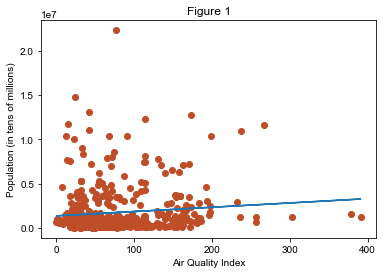

correlation coefficient, p-value: (0.10549200645121772, 0.02014089300197636)
time: 140 ms (started: 2021-12-05 21:15:17 -05:00)


In [12]:
functions.create_figure1(parameter_dict)

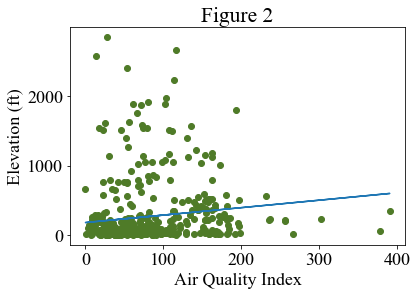

correlation coefficient, p-value: (0.13136811085771335, 0.0037532685213509396)
time: 135 ms (started: 2021-12-05 21:15:27 -05:00)


In [13]:
functions.create_figure2(parameter_dict)

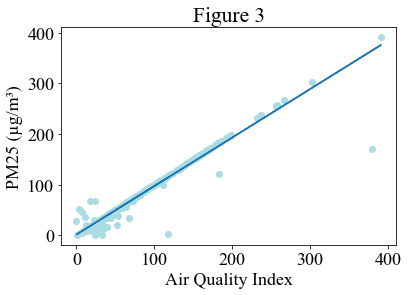

correlation coefficient, p-value: (0.9731060988788065, 4.09030770964454e-310)
time: 120 ms (started: 2021-12-05 21:15:36 -05:00)


In [14]:
functions.create_figure3(parameter_dict)

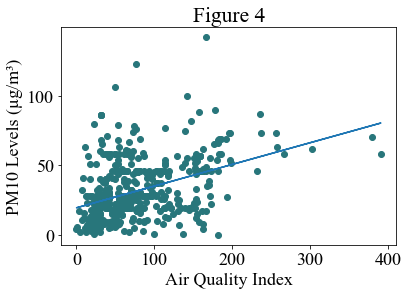

correlation coefficient, p-value: (0.40312097762649624, 2.237812723496048e-20)
time: 115 ms (started: 2021-12-05 21:15:46 -05:00)


In [15]:
functions.create_figure4(parameter_dict)

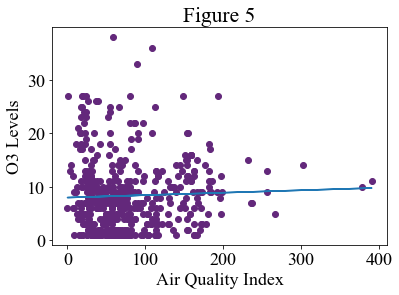

correlation coefficient, p-value: (0.03852017053760951, 0.39730512841052523)
time: 120 ms (started: 2021-12-05 21:15:55 -05:00)


In [16]:
functions.create_figure5(parameter_dict)

## Time Complexity 

## Analysis 

## Take-aways

The factor that by far had the highest correlation with Air Quality Index was the measure of the PM25 pollutant. The relationship is strong and appears to be significant. Further testing will more thoroughly analyze the significance of the relationship between PM25 levels and Air Quality Index levels. Another route we could take in the future is to gather data from cities other than the 1000 most populated cities in the world. We wonder how the correlations we analyzed would differ from medium-sized cities and small towns.

## References